# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.0          
tensorboard-plugin-wit        1.7.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.0          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.26.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [ ]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Wed Jan 20 22:02:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    31W / 250W |    961MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.96315117, 0.69354453],
       [0.8345547 , 0.78936069],
       [0.93452665, 0.38213417]])

In [ ]:
X > 0.5

array([[ True,  True],
       [ True,  True],
       [ True, False]])

In [ ]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 0.38213417]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

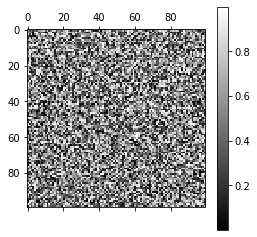

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

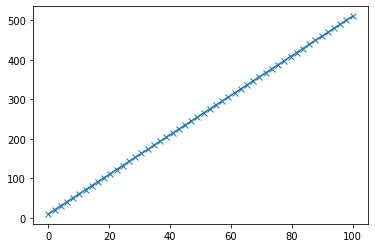

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


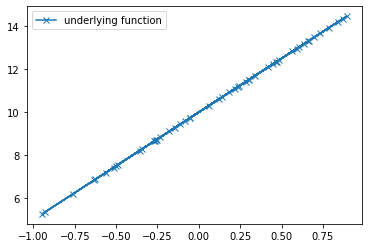

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

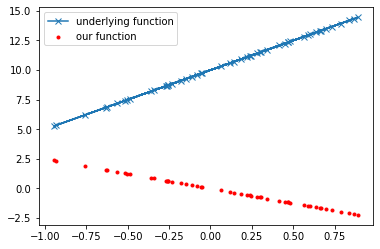

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, num_input, num_output=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
    self.bias = np.zeros((1))
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 128.4136378949635


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.random.randn((1))
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

132.9671083753066
85.65650500946705


### Train using gradient descent!

Epoch 0, loss 164.06428259031532
Epoch 5, loss 19.87724010913732
Epoch 10, loss 3.7529891846754824
Epoch 15, loss 1.4117925612449573
Epoch 20, loss 0.7670411698931703
Epoch 25, loss 0.4564797239088933
Epoch 30, loss 0.27629294396356263
Epoch 35, loss 0.16772480331762565
Epoch 40, loss 0.10186968724128265
Epoch 45, loss 0.06187717494255795
Epoch 50, loss 0.03758568562603983
Epoch 55, loss 0.02283050887479345


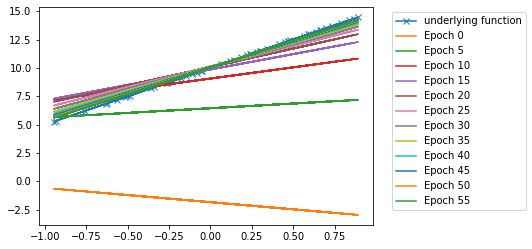

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


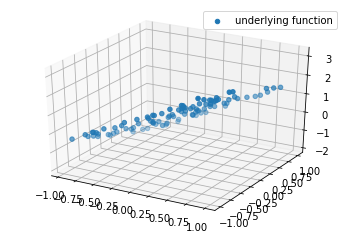

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

4.749674783807654


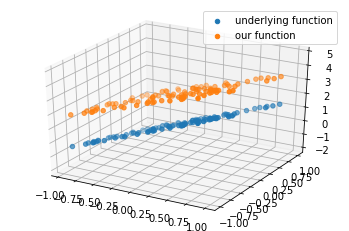

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 4.749674783807654
Epoch 1, loss 3.0453057919772406
Epoch 2, loss 1.954329167472339
Epoch 3, loss 1.255768305058679
Epoch 4, loss 0.8082811682508241
Epoch 5, loss 0.5214586106735166
Epoch 6, loss 0.3374676908011957
Epoch 7, loss 0.21931126604108198
Epoch 8, loss 0.1433191234178629
Epoch 9, loss 0.09434545590663959
Epoch 10, loss 0.06269722946770971
Epoch 11, loss 0.04216957576589217
Epoch 12, loss 0.028789208980126383
Epoch 13, loss 0.020010679189914914
Epoch 14, loss 0.014202252892087455
Epoch 15, loss 0.010317036958052554
Epoch 16, loss 0.00768258515621623
Epoch 17, loss 0.0058662885870595025
Epoch 18, loss 0.004589240759945935
Epoch 19, loss 0.0036711105970104615


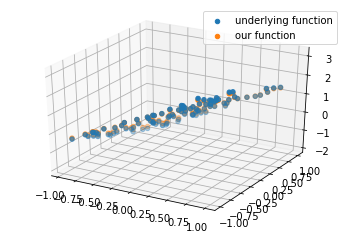

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


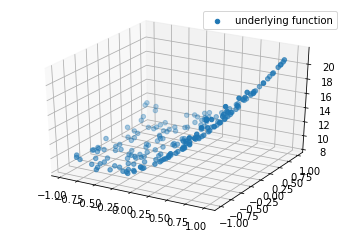

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 151.7009099158318
Epoch 1, loss 98.82891401544099
Epoch 2, loss 64.87309305113516
Epoch 3, loss 43.03748644581332
Epoch 4, loss 28.971488844859927
Epoch 5, loss 19.889443363442812
Epoch 6, loss 14.00727761953628
Epoch 7, loss 10.18200333150839
Epoch 8, loss 7.681021785788845
Epoch 9, loss 6.034488966865044
Epoch 10, loss 4.940829490822109
Epoch 11, loss 4.206260565262817
Epoch 12, loss 3.706079721050642
Epoch 13, loss 3.359880260295518
Epoch 14, loss 3.115680255061175
Epoch 15, loss 2.9397565439330036
Epoch 16, loss 2.8101305210126295
Epoch 17, loss 2.7123917857736473
Epoch 18, loss 2.637018769460711
Epoch 19, loss 2.5776581536661625
Epoch 20, loss 2.530018597734734
Epoch 21, loss 2.4911582475702296
Epoch 22, loss 2.459024825974644
Epoch 23, loss 2.432157874959242
Epoch 24, loss 2.409495216821841
Epoch 25, loss 2.390246503131659
Epoch 26, loss 2.373810039450885
Epoch 27, loss 2.359717602796654
Epoch 28, loss 2.3475974324959963
Epoch 29, loss 2.337149076426632
Epoch 30, lo

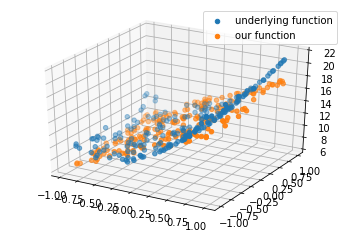

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

137.7678415730626


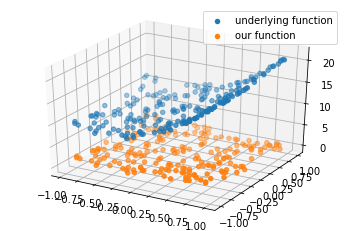

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

183.92659245503003
121.22363184384307


Epoch 0, loss 121.22363184384307
Epoch 1, loss 80.52136616601192
Epoch 2, loss 52.647577543679525
Epoch 3, loss 29.983655597550243
Epoch 4, loss 9.382119411686276
Epoch 5, loss 3.1270694900301486
Epoch 6, loss 2.1773674096321587
Epoch 7, loss 8.843384297642746
Epoch 8, loss 37.28127457190468
Epoch 9, loss 26.078179182992315
Epoch 10, loss 16.375952466359866
Epoch 11, loss 6.34042232290848
Epoch 12, loss 1.1860532660475394
Epoch 13, loss 0.9764100511214074
Epoch 14, loss 0.8791709830660699
Epoch 15, loss 0.7913090510709876
Epoch 16, loss 0.706427742714953
Epoch 17, loss 0.6278314111465494
Epoch 18, loss 0.553464832310232
Epoch 19, loss 0.48421099106688587


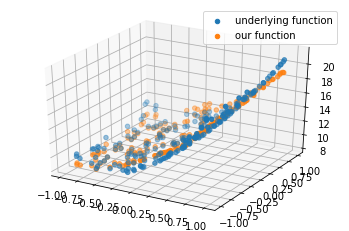

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

tensor(167.6712, grad_fn=<MseLossBackward>)


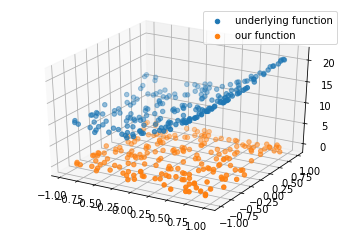

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(167.6712, grad_fn=<MseLossBackward>)
tensor(156.9807, grad_fn=<MseLossBackward>)


tensor(156.9807, grad_fn=<MseLossBackward>)
tensor(76.8141, grad_fn=<MseLossBackward>)
tensor(20.2307, grad_fn=<MseLossBackward>)
tensor(49.0672, grad_fn=<MseLossBackward>)
tensor(24.2672, grad_fn=<MseLossBackward>)
tensor(74.4847, grad_fn=<MseLossBackward>)
tensor(36.5967, grad_fn=<MseLossBackward>)
tensor(2.8537, grad_fn=<MseLossBackward>)
tensor(2.8753, grad_fn=<MseLossBackward>)
tensor(4.3993, grad_fn=<MseLossBackward>)
tensor(3.5408, grad_fn=<MseLossBackward>)
tensor(5.9295, grad_fn=<MseLossBackward>)
tensor(3.2296, grad_fn=<MseLossBackward>)
tensor(5.1117, grad_fn=<MseLossBackward>)
tensor(2.6344, grad_fn=<MseLossBackward>)
tensor(3.8602, grad_fn=<MseLossBackward>)
tensor(2.1286, grad_fn=<MseLossBackward>)
tensor(2.9058, grad_fn=<MseLossBackward>)
tensor(1.7225, grad_fn=<MseLossBackward>)
tensor(2.2243, grad_fn=<MseLossBackward>)
tensor(1.3958, grad_fn=<MseLossBackward>)
tensor(1.7176, grad_fn=<MseLossBackward>)
tensor(1.1280, grad_fn=<MseLossBackward>)
tensor(1.3286, grad_fn=<Ms

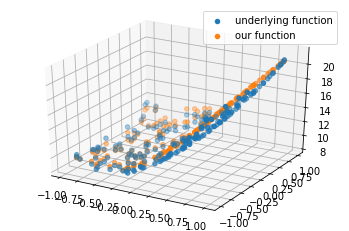

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 82.9163
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 30.9014
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.5563
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6956
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7280
E

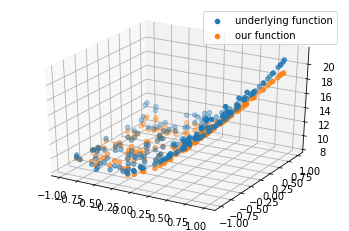

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

## Next time

We will work on a classification task.